In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

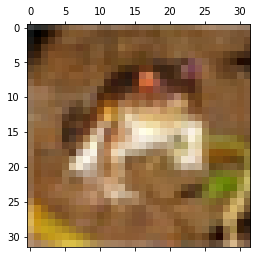

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

array([6], dtype=uint8)

In [11]:
Image_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
Image_name[y_train[0][0]]

'frog'

In [36]:
X_scale_train=X_train/255.0

In [19]:
np.max(X_train[0])

255

In [46]:
model=keras.Sequential([
    
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)) ,
    keras.layers.MaxPooling2D((4,4)),
    keras.layers.Conv2D(64,(3,3),activation='relu',padding="same" ),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(108,(3,3),activation='relu',padding="same" ),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(80,activation='relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [47]:
model.compile(

    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

In [48]:
model.fit(X_scale_train,y_train,epochs=2)

Train on 50000 samples
Epoch 1/2
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.7519 - accuracy: 0.3244
Epoch 2/2
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.3414 - accuracy: 0.5157


In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 108)         62316     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 108)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 108)              

In [49]:
X_scale_test=X_test/255.0

In [50]:
model.evaluate(X_scale_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.2097927543640137, 0.5666]